# Implement a KNN model to classify the animals in to categorie

In [80]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [81]:
# Read the Dataset

zoo = pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [82]:
# Display first 5 rows

zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [83]:
# Display last 5 rows

zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [84]:
# Information of the data

zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [85]:
# Statistical Information of the data

zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [86]:
# column names

zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [87]:
# skewness

zoo.skew()

hair        0.304908
feathers    1.538501
eggs       -0.346676
milk        0.388876
airborne    1.251556
aquatic     0.608577
predator   -0.222443
toothed    -0.431569
backbone   -1.707118
breathes   -1.461244
venomous    3.163428
fins        1.799849
legs        0.139427
tail       -1.126430
domestic    2.250991
catsize     0.263515
type        0.852362
dtype: float64

In [88]:
# kurtosis

zoo.kurt()

hair       -1.945969
feathers    0.373997
eggs       -1.918204
milk       -1.886536
airborne   -0.442773
aquatic    -1.662967
predator   -1.990336
toothed    -1.850801
backbone    0.932321
breathes    0.137564
venomous    8.168668
fins        1.264099
legs       -0.598630
tail       -0.746333
domestic    3.128527
catsize    -1.969973
type       -0.697422
dtype: float64

In [89]:
# no of rows and columns

zoo.shape

(101, 18)

In [90]:
# missing values

zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [91]:
# Correlation

zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


# Visualisations

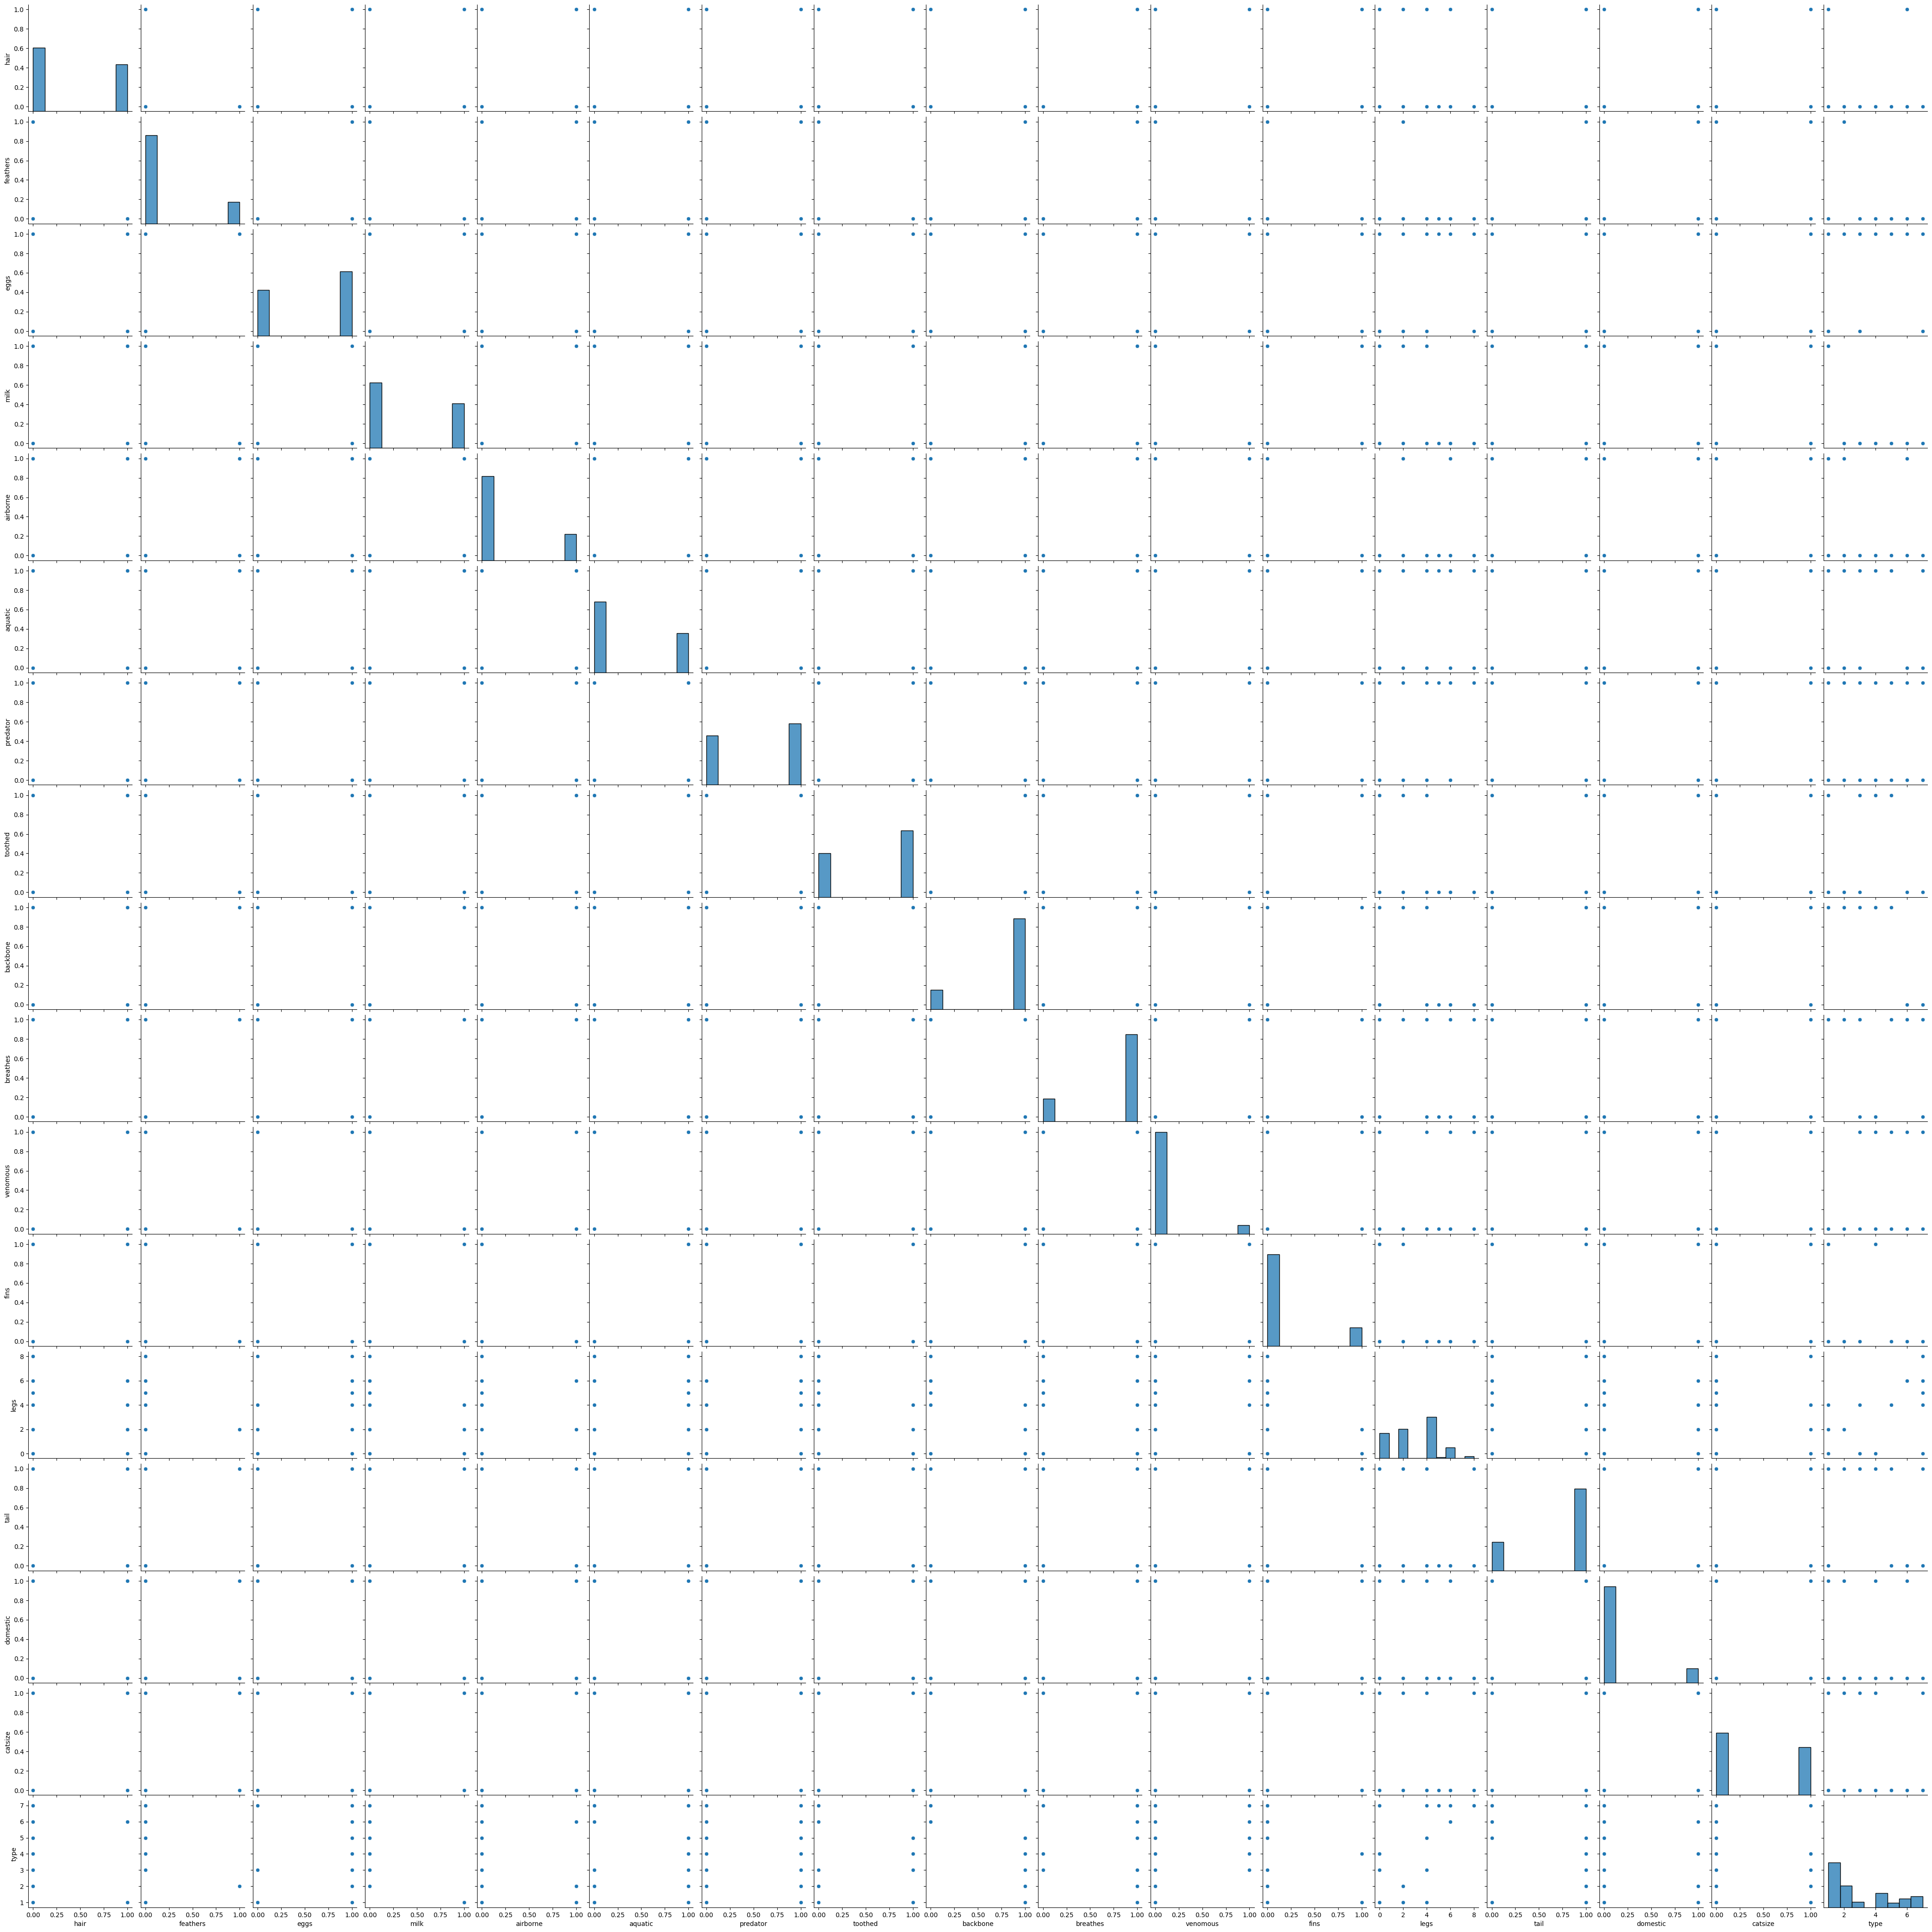

In [92]:
# Pairplot

sns.pairplot(zoo)

<Axes: >

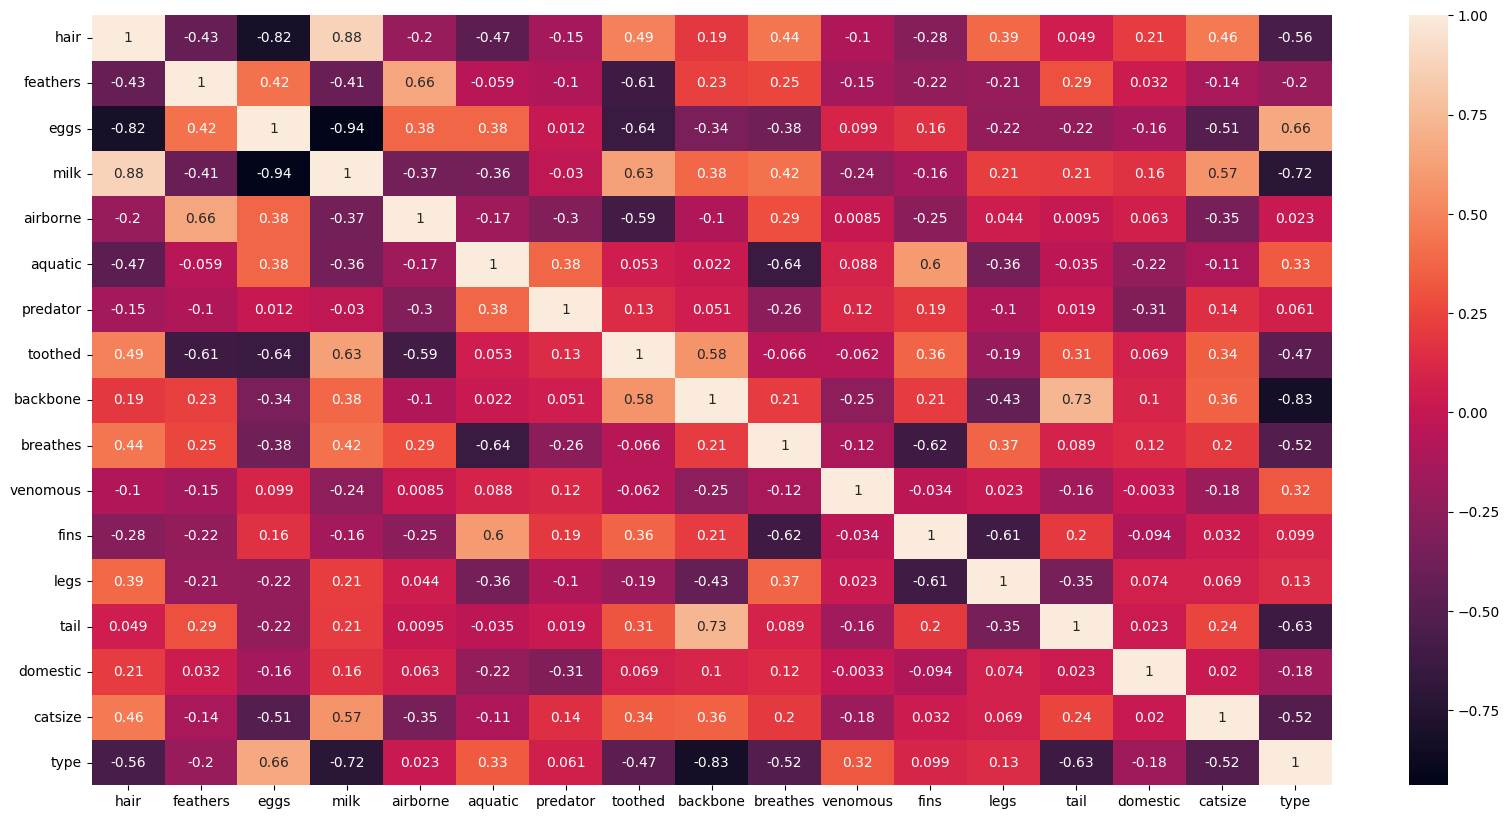

In [93]:
# Heatmap

plt.figure(figsize=(20,10))
sns.heatmap(zoo.corr(),annot=True)


<Axes: ylabel='Count'>

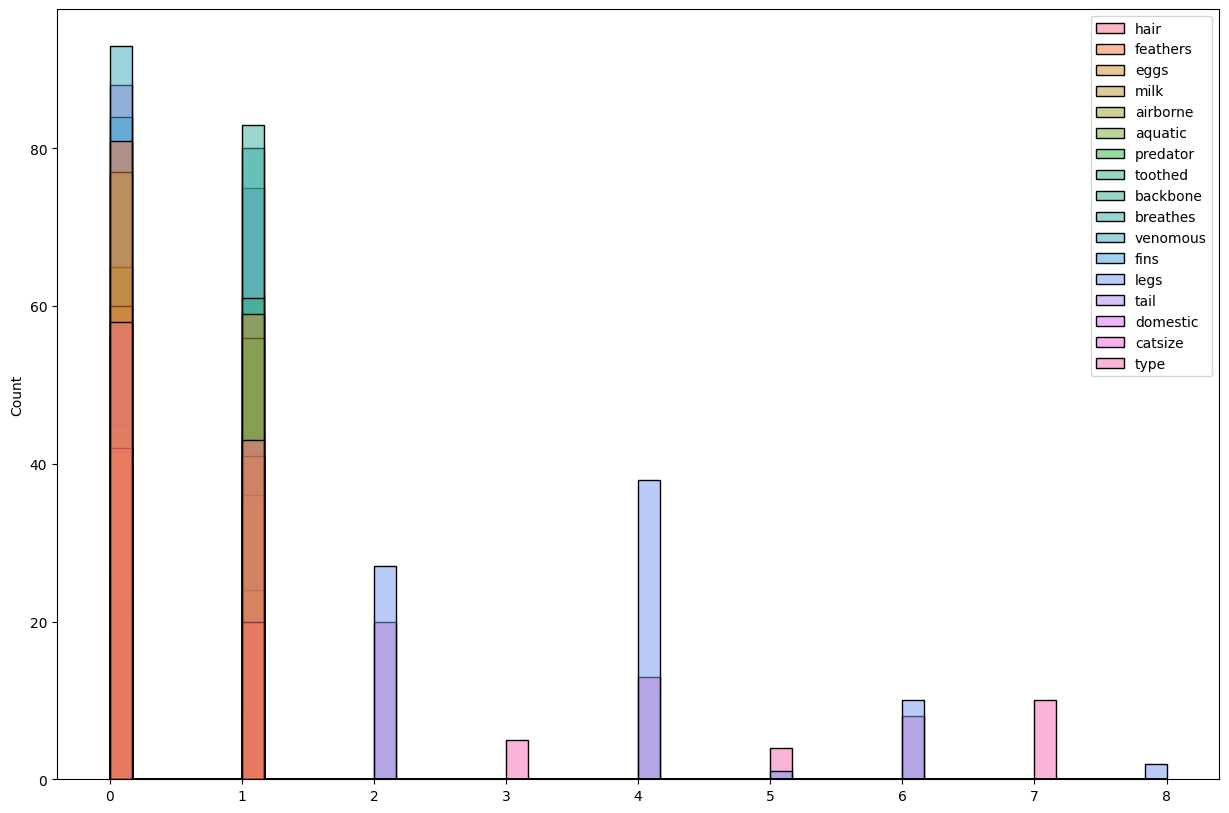

In [94]:
# Histplot

plt.figure(figsize=(15,10))
sns.histplot(data=zoo)

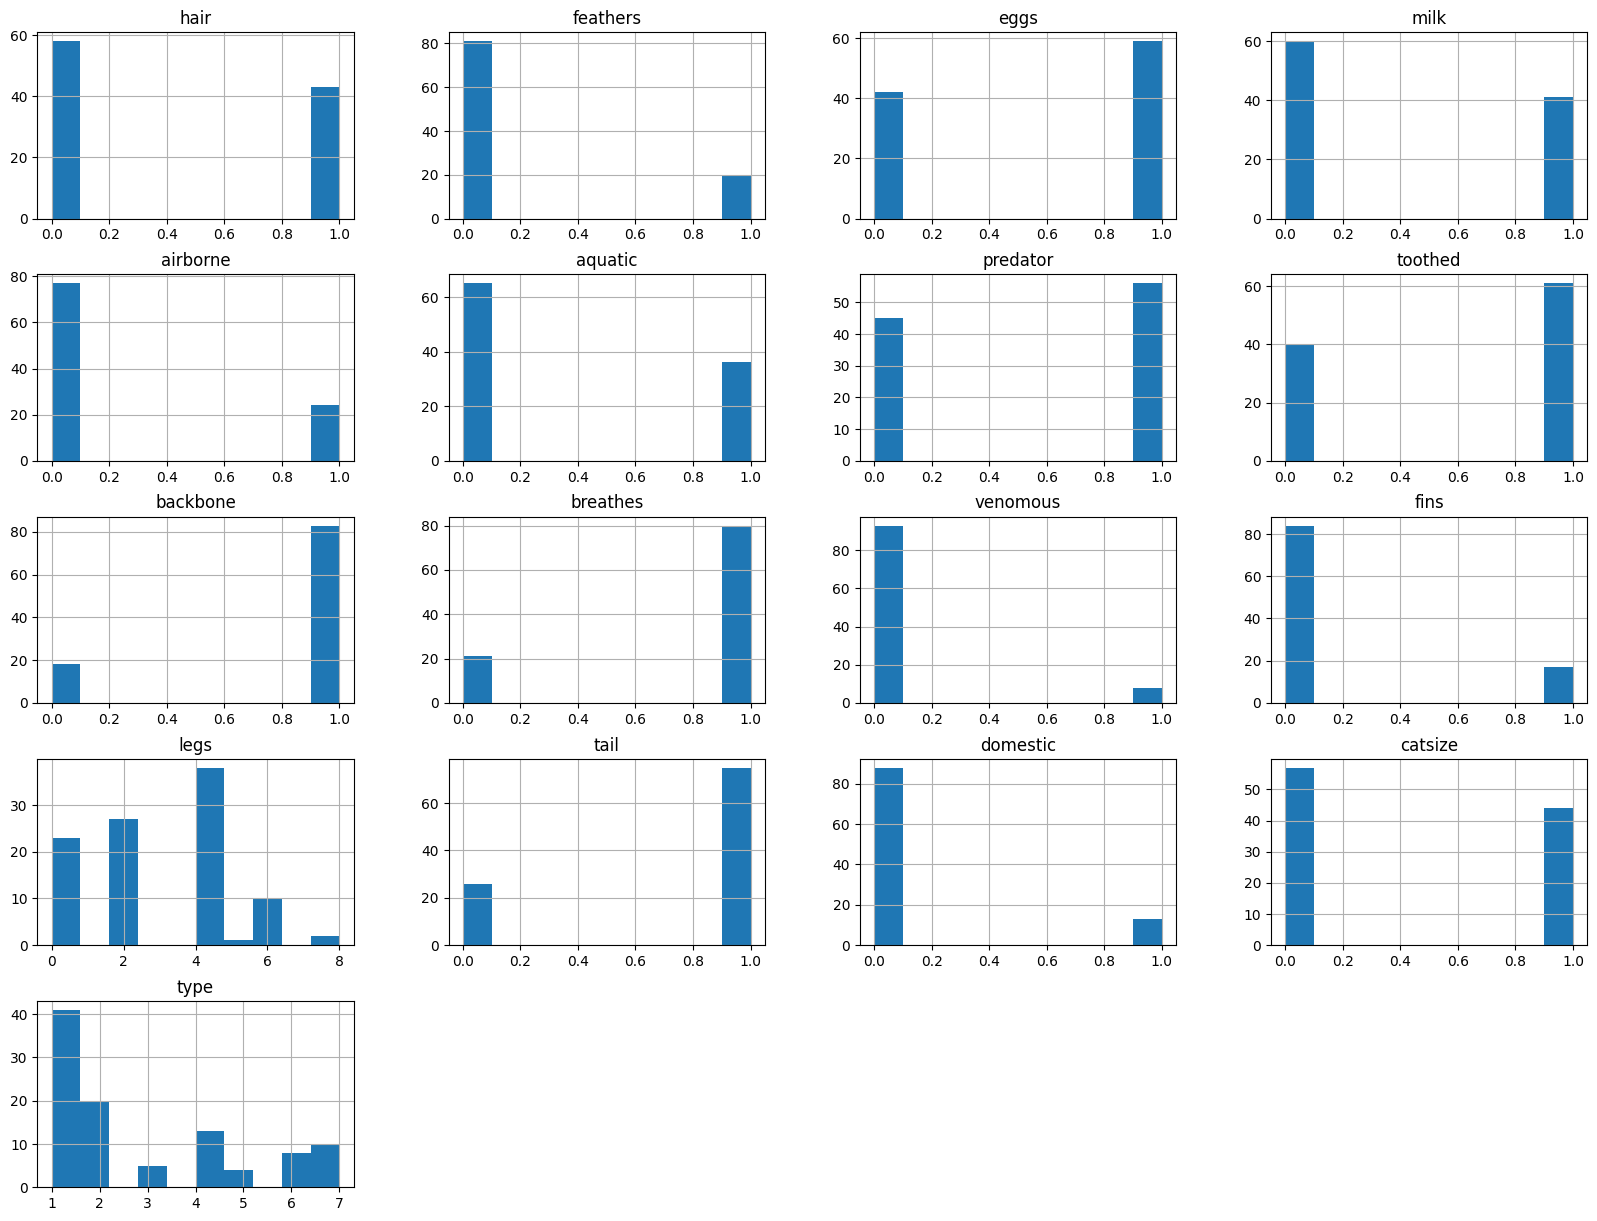

In [95]:
# Histogram

zoo.hist(figsize=(20,15))
plt.show()

In [96]:
features=["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomus","fins","legs","tail","domestic","catsize","type"]

In [97]:
features

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomus',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

# Barplots


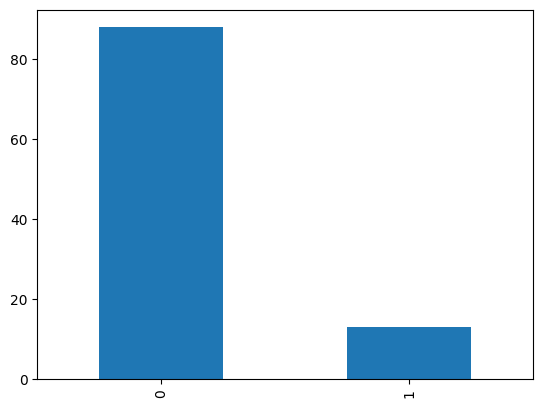

0    88
1    13
Name: domestic, dtype: int64


In [98]:
zoo['domestic'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['domestic'].value_counts())

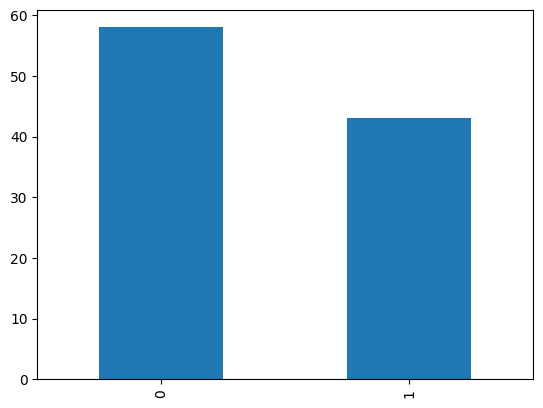

0    58
1    43
Name: hair, dtype: int64


In [99]:
zoo["hair"].value_counts(sort=True).plot.bar()
plt.show()
print(zoo["hair"].value_counts())

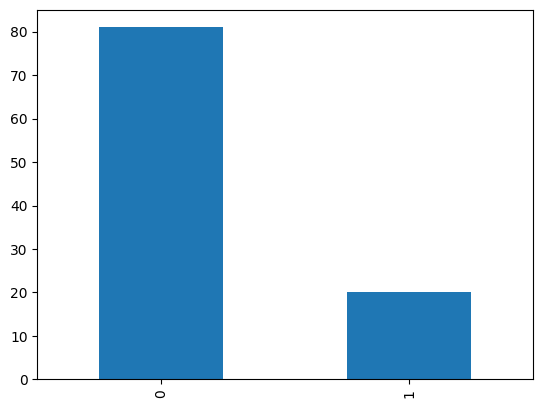

0    81
1    20
Name: feathers, dtype: int64


In [100]:
zoo['feathers'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['feathers'].value_counts())

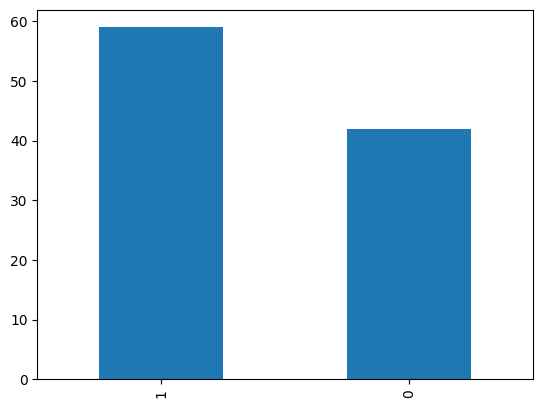

1    59
0    42
Name: eggs, dtype: int64


In [101]:
zoo['eggs'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['eggs'].value_counts())

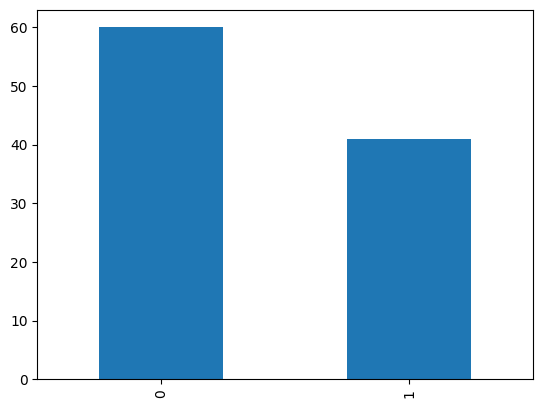

0    60
1    41
Name: milk, dtype: int64


In [102]:
zoo['milk'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['milk'].value_counts())

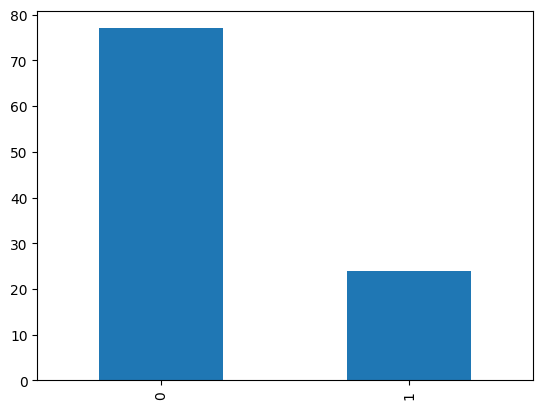

0    77
1    24
Name: airborne, dtype: int64


In [103]:
zoo['airborne'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['airborne'].value_counts())

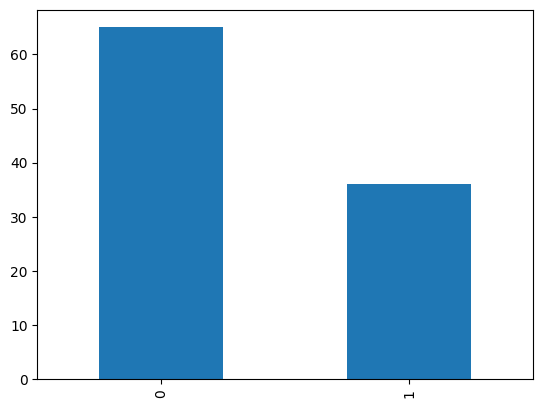

0    65
1    36
Name: aquatic, dtype: int64


In [104]:
zoo['aquatic'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['aquatic'].value_counts())

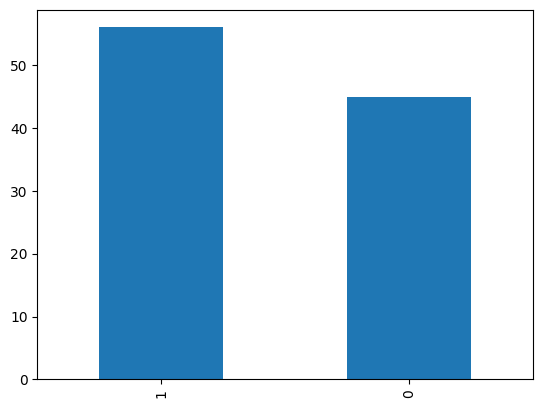

1    56
0    45
Name: predator, dtype: int64


In [105]:
zoo['predator'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['predator'].value_counts())

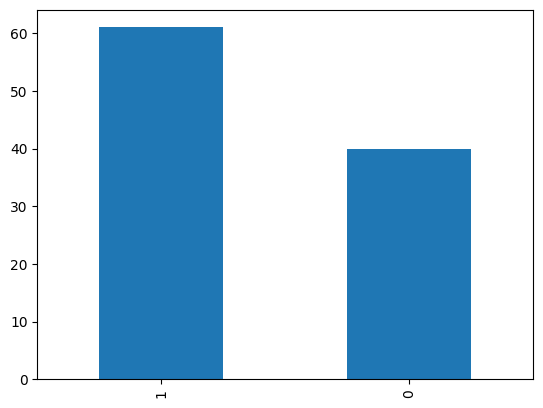

1    61
0    40
Name: toothed, dtype: int64


In [106]:
zoo['toothed'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['toothed'].value_counts())

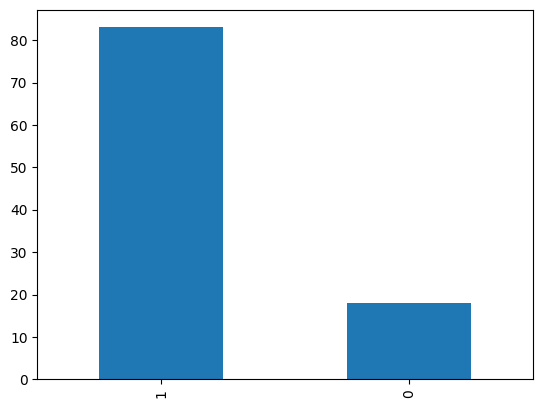

1    83
0    18
Name: backbone, dtype: int64


In [107]:
zoo['backbone'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['backbone'].value_counts())

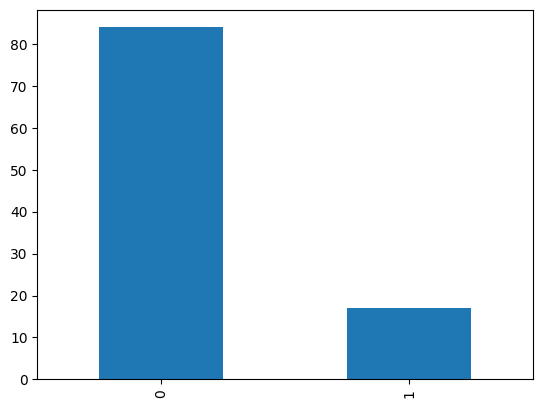

0    84
1    17
Name: fins, dtype: int64


In [108]:
zoo['fins'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['fins'].value_counts())

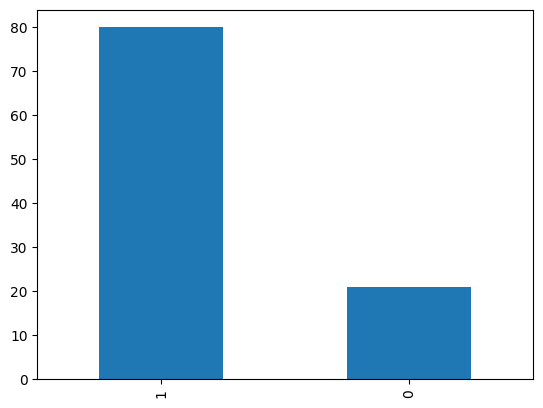

1    80
0    21
Name: breathes, dtype: int64


In [109]:
zoo['breathes'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['breathes'].value_counts())

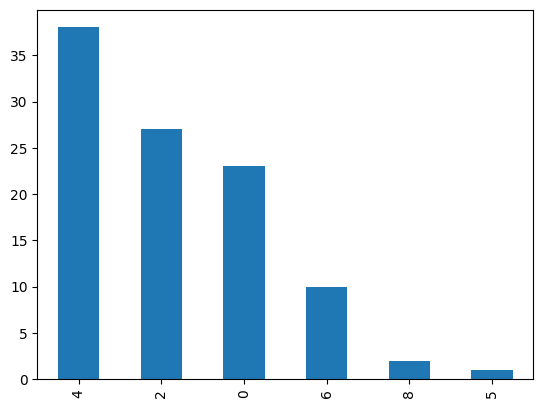

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64


In [110]:
zoo['legs'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['legs'].value_counts())

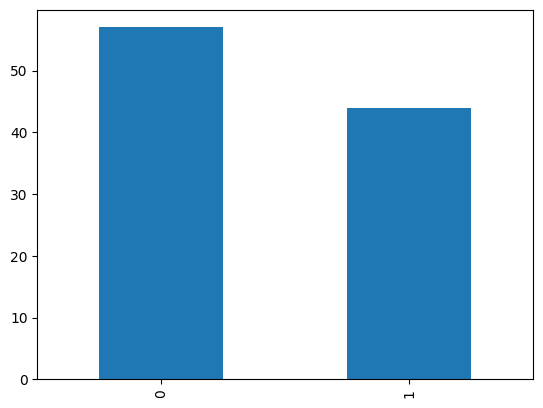

0    57
1    44
Name: catsize, dtype: int64


In [111]:
zoo['catsize'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['catsize'].value_counts())

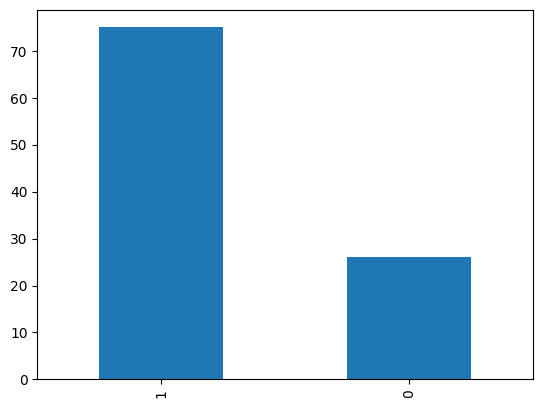

1    75
0    26
Name: tail, dtype: int64


In [112]:
zoo['tail'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['tail'].value_counts())

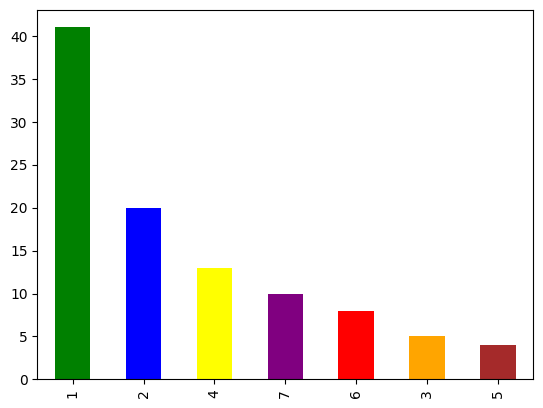

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


In [113]:
value_counts = zoo["type"].value_counts(sort=True)
colors = ["green", "blue", "yellow", "purple", "red", "orange", "brown"]
value_counts.plot.bar(color = colors)
plt.show()
print(value_counts)


# Piechart

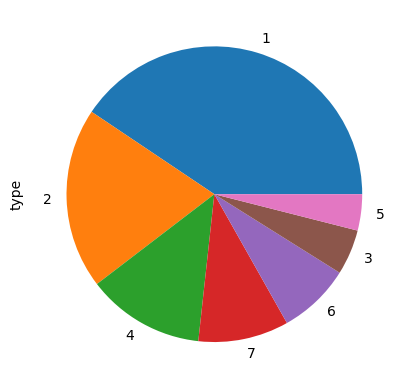

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


In [114]:
zoo["type"].value_counts(sort=True).plot.pie()
plt.show()
print(zoo["type"].value_counts())

In [115]:
# Dependent and independent variables

array=zoo.values
x=zoo.iloc[:,1:17]
y=zoo.iloc[:,-1]

In [116]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [117]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

# Grid search for algorithm tuning

In [118]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [119]:
# Grid Search

num_folds=10
kfold=KFold(n_splits=5)

In [120]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [121]:
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)

In [122]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [123]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


# Grid search on train dataset

In [124]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(zoo,test_size=0.2,random_state=40)


In [125]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)


In [126]:
n_neighbors=np.array(range(1,45))
param_grid= dict(n_neighbors=n_neighbors)

In [127]:
model=KNeighborsClassifier()
grid1=GridSearchCV(estimator=model,param_grid=param_grid)
grid1.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44])})

In [128]:
print(grid1.best_score_)
print(grid1.best_params_)

0.9625
{'n_neighbors': 1}


In [129]:
KNN_preds1 = grid1.predict(xtrain)
pd.crosstab(ytrain,KNN_preds1)

col_0,1,2,3,4,5,6,7
type,,,,,,,
1,32,0,0,0,0,0,0
2,0,14,0,0,0,0,0
3,0,0,4,0,0,0,0
4,0,0,0,11,0,0,0
5,0,0,0,0,3,0,0
6,0,0,0,0,0,6,0
7,0,0,0,0,0,0,10


# Grid search on test dataset

In [130]:
n_neighbors=np.array(range(1,40))
param_grid= dict(n_neighbors=n_neighbors)

In [131]:
model_1=KNeighborsClassifier()
grid1=GridSearchCV(estimator=model_1,param_grid=param_grid)
grid1.fit(xtest,ytest)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [132]:
print(grid1.best_score_)
print(grid1.best_params_)

0.86
{'n_neighbors': 1}


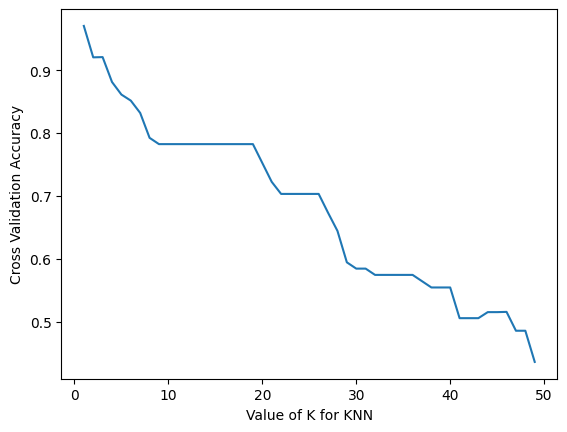

In [133]:
# Choosing the K range between  1 to 50

k_range=range(1,50)
k_scores=[]

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=4)
    k_scores.append(scores.mean())

#Visualising the plot

plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validation Accuracy")
plt.show()

In [134]:
print(xtrain.shape)

(80, 16)


In [135]:
print(xtest.shape)

(21, 16)


In [136]:
from sklearn.neighbors import KNeighborsClassifier as KNC
model_2=KNeighborsClassifier()
grid2=GridSearchCV(estimator=model_2,param_grid=param_grid)
grid2.fit(xtest,ytest)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [137]:
KNN_preds2 = grid1.predict(xtest)
pd.crosstab(ytest,KNN_preds2)

col_0,1,2,3,4,5,6
type,,,,,,
1,9,0,0,0,0,0
2,0,6,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,2,0,0
5,0,0,0,0,1,0
6,0,0,0,0,0,2


In [138]:
accuracy=[]
for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
    train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
    test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
    accuracy.append([train_acc,test_acc])
print(accuracy)
print(len(accuracy))

[[0.9875, 0.8095238095238095], [0.9375, 0.7619047619047619], [0.8875, 0.7619047619047619], [0.8375, 0.7619047619047619], [0.8375, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7142857142857143], [0.7125, 0.6666666666666666], [0.7125, 0.6666666666666666], [0.7125, 0.6666666666666666], [0.7125, 0.6666666666666666], [0.6125, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5375, 0.6190476190476191], [0.5125, 0.6190476190476191]]
24


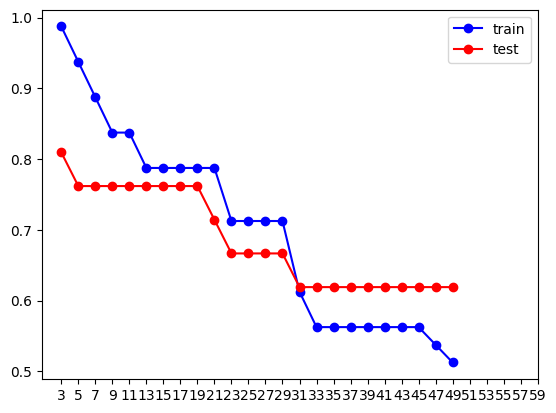

In [139]:
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],"bo-")
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],"ro-")
plt.legend(["train","test"])
plt.xticks(np.arange(3,60,2))
plt.show()


# Building the model for k=2

In [140]:
neighbour=KNC(n_neighbors=2)

In [141]:
from scipy import stats
import numpy as np
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=2 : ",train_acc,test_acc)

K=2 :  1.0 0.8095238095238095


# Building the model for k=3

In [142]:
neighbour=KNC(n_neighbors=3)

In [143]:
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.9875 0.8095238095238095


# Building the model for k=4

In [144]:
neighbour=KNC(n_neighbors=4)

In [145]:
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=4 : ",train_acc,test_acc)

K=4 :  0.9375 0.7619047619047619


# Building the model for k=5

In [146]:
neighbour=KNC(n_neighbors=5)

In [147]:
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=5 : ",train_acc,test_acc)


K=5 :  0.9375 0.7619047619047619


# K=3 gives the best accuracy